# **DEEP LEARNING FOR COMPUTER SYSTEM**
# **Chapter 5: The Advanced CNN architectures**


## **LeNet implementation with Keras and MNIST dataset**

---

## 1. Load dataset

In [5]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("#train examples: ", len(X_train))
print("#test examples: ", len(X_test))
print('X_train shape:', X_train.shape)

#train examples:  60000
#test examples:  10000
X_train shape: (60000, 28, 28)


## 2. Preprocessing image

In [6]:
# Normalize
import numpy as np

mean = np.mean(X_train)
std = np.std(X_train)
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)

In [7]:
# Encode categorical label using one-hot
from keras.utils import to_categorical

n_classes = 10

y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [8]:
# reshape input image
w, h = 28, 28
X_train = X_train.reshape(len(X_train), w, h, 1)
X_test = X_test.reshape(len(X_test), w, h, 1)

## 3. Define the model's architecture

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

model = Sequential()

model.add(Conv2D(6, 5, padding='same', activation='tanh',
                 input_shape=(28, 28, 1)))

model.add(AveragePooling2D(pool_size=2, strides=2))

model.add(Conv2D(16, 5, activation='tanh'))

model.add(AveragePooling2D(pool_size=2, strides=2))

model.add(Conv2D(120, 5, activation='tanh'))

model.add(Flatten())

model.add(Dense(84, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

## 4. Compile and Train

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

The authors used a manual decay schedule:

In [11]:
def lr_schedule(epoch):
  if epoch <=2: return 5e-4
  elif epoch <=5: return 2e-4
  elif epoch <=9: return 5e-5
  return 1e-5

In [12]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

checkpointer = ModelCheckpoint(filepath='model.weights.best.keras', verbose=1,
                               save_best_only=True)

lr_scheduler = LearningRateScheduler(lr_schedule)

hist = model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=2,
                 validation_data=(X_test, y_test),
                 callbacks=[checkpointer, lr_scheduler])

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.10006, saving model to model.weights.best.keras
1875/1875 - 12s - loss: 0.2337 - accuracy: 0.9301 - val_loss: 0.1001 - val_accuracy: 0.9688 - lr: 5.0000e-04 - 12s/epoch - 7ms/step
Epoch 2/20

Epoch 2: val_loss improved from 0.10006 to 0.07047, saving model to model.weights.best.keras
1875/1875 - 8s - loss: 0.0847 - accuracy: 0.9733 - val_loss: 0.0705 - val_accuracy: 0.9777 - lr: 5.0000e-04 - 8s/epoch - 4ms/step
Epoch 3/20

Epoch 3: val_loss improved from 0.07047 to 0.05520, saving model to model.weights.best.keras
1875/1875 - 8s - loss: 0.0581 - accuracy: 0.9816 - val_loss: 0.0552 - val_accuracy: 0.9805 - lr: 5.0000e-04 - 8s/epoch - 4ms/step
Epoch 4/20

Epoch 4: val_loss improved from 0.05520 to 0.04119, saving model to model.weights.best.keras
1875/1875 - 7s - loss: 0.0344 - accuracy: 0.9897 - val_loss: 0.0412 - val_accuracy: 0.9860 - lr: 2.0000e-04 - 7s/epoch - 4ms/step
Epoch 5/20

Epoch 5: val_loss improved from 0.04119 to 0.03918

## 5. Evaluation

In [13]:
model.load_weights('model.weights.best.keras')

In [14]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test accuracy: %.4f%%' % (score[1]*100))

Test accuracy: 98.9400%


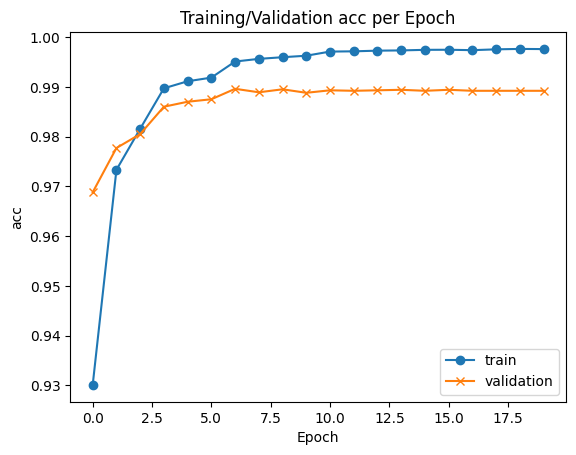

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(hist.history['accuracy'], 'o-', label='train')
ax.plot(hist.history['val_accuracy'], 'x-', label='validation')
ax.legend(loc=0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')
plt.show()

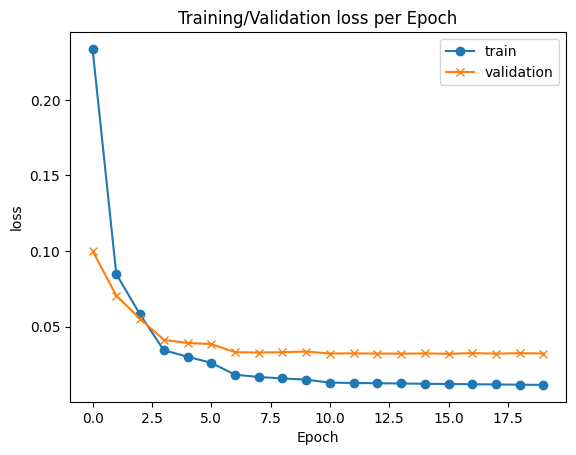

In [16]:
fig, ax = plt.subplots()

ax.plot(hist.history['loss'], 'o-', label='train')
ax.plot(hist.history['val_loss'], 'x-', label='validation')
ax.legend(loc=0)
ax.set_title('Training/Validation loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('loss')
plt.show()